<a href="https://colab.research.google.com/github/jabazer/tao-fing/blob/master/GradienteEstoc%C3%A1stico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Import packages.
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import pylab as pl



En este último notebook volvemos al método más sencillo de optimización, descenso por gradiente, pero agregamos ruido modelado como variables aleatorias o procesos estocásticos.

El resultante es un método para diseñar algoritmos que procesen datos aleatorios recursivamente, y es base de tres familias de algoritmos de aprendizaje automático

1) Reinforcement learning

2) Neural networks

3) Linear mean square filters

En este caso tenemos que la función a minimizar es la esperanza de una función aleatoria

$$f(\theta)=E_{\xi}\left[F(\theta,\xi)\right]$$

donde $\xi$ es la variable aleatoria, y $\theta$ la variable determinística que 
queremos obtener.

Luego queremos resolver 

\begin{align}
\min_{\theta\in \mathcal \Theta}& f(\theta)\\
=\min_{\theta\in  \Theta}& E_{\xi}\left[F(\theta,\xi)\right]\\
=\min_{\theta\in  \Theta}& \int p(\xi)F(\theta,\xi) d\xi
\end{align}




Si aplicamos descenso por gradiente a este problema tenemos 

\begin{align}
\theta^{k+1}&=\theta^k+\alpha_k \nabla_\theta f(\theta^k)\\
\theta^{k+1}&=\theta^k+\alpha_k \nabla_\theta E_{\xi}\left[F(\theta,\xi)\right]
\end{align}

Si pudieramos calcular la esperanza, entonces simplemente corremos el algoritmo de arriba. 

Si en cambio tenemos una muestra de la variable aleatoria $w^k$, o mejor el del gradiente estocástico entonces podemos simplemente tirar la esperanza y usar una muestra

\begin{align}
\hat \theta^{k+1}&=\hat \theta^k+\alpha_k \nabla_\theta  F(\theta^k,\xi^k)
\end{align}

Idea, el gradiente es un acumulador que acumula promedios recursivamente, y estos aproximan la esperanza 

De hecho uno no tiene por qué quedarse con una sola muestra y puede hacer bacth stochastic gradient descent



\begin{align}
\hat \theta^{k+1}&=\hat \theta^k+\alpha_k \sum_{n=1}^N \nabla_\theta  F(\theta^k,\xi^k_n)
\end{align}


Es algoritmo de SGD corresponde a usar una sola muestra por iteración  $N=1$

Ejemplo

$$y=A\theta_0+\xi, \text{ con } \xi_i\sim \mathcal N(0,\sigma^2),\ i=1,2$$

Queremos resolver

\begin{align}
\min_{\theta\in \mathbb R^2}E\left[||A\theta -y||^2\right]
\end{align}

El gradiente es 


\begin{align}
E\left[2A^TA\theta -2A^Ty\right]
\end{align}

El gradiente estocástico

\begin{align}
2A^TA\theta -2A^Ty
\end{align}

para ello necesitamos muestras de la variable aleatoria $y$

Entonces corremos
\begin{align}
\hat \theta^{k+1}&=\hat \theta^k+\alpha_k\left(2A^TA\theta^k -2A^Ty^k\right) 
\end{align}




(0.0, 2.0)

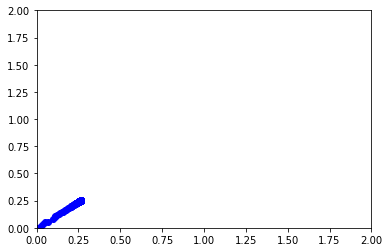

In [49]:
sigma=2
#sigma=0
A=[[2, 1],
   [1, 2]]
I=[[1, 0],
   [0, 1]]
AT=np.transpose(A)
ATA=np.dot(AT,A)
theta_0=np.transpose([1,1])
trayectoria0=np.array([])
trayectoria1=np.array([])
theta=np.array([0,0])
for k in np.arange(500):
    trayectoria0=np.append(trayectoria0,theta[0])
    trayectoria1=np.append(trayectoria1,theta[1])
    alpha=1/(10*k**2+1000)
    #alpha=1/(1000)
    xi = np.random.normal(0, sigma, 2)
    y=np.dot(A,theta_0)+xi;
    gradiente_estocastico=2*np.dot(ATA,theta)-2*np.dot(AT,y)
    theta=theta-alpha*gradiente_estocastico;
pl.plot(trayectoria0,trayectoria1,'bo-')
pl.xlim(0, 2)
pl.ylim(0, 2)
